<a href="https://colab.research.google.com/github/kunalburgul/MLDS_Problems/blob/main/recommender_system/book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommender System**

<img src = "https://miro.medium.com/max/1080/1*81I8dEzTfiMdwMByUcRbag.jpeg">

**Content**

The Book-Crossing dataset comprises 3 files.

***Users***

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

***Books***

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

***Ratings***

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


## **Recommendation System**

A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.

Let's first download and load the data from the Kaggle : [Book Recommender System
](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqblZtZHFEUmhNX3NtZU9Yek5TazFCN0tKcnRMd3xBQ3Jtc0ttalJMTWdpYzEtYzAwSVQydjlBQ2pDSDVKTGFYMGo0cVpVQk1kMm9zZEY1Zm5aNWdpaUJQcE0zcXZuSlBQX0xVOWFGelpWR0J1QVdNbXdnQmp5UG0yREZ0azVCMWYxb3Q4NExfdXpKX1dGVExINFpwUQ&q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Farashnic%2Fbook-recommendation-dataset&v=1YoD0fg3_EM)

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 76% 18.0M/23.8M [00:00<00:00, 72.4MB/s]
100% 23.8M/23.8M [00:00<00:00, 76.6MB/s]


In [3]:
# Extracting the files
import zipfile
zip_ref = zipfile.ZipFile('book-recommendation-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
# Some baisc libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading the files
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Basic Exploration over the data**

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [12]:
# Let's get the shape of all the 3 dataframes
print("Books -", books.shape, " \nUsers - ", users.shape, " \nRatings -", ratings.shape)

Books - (271360, 8)  
Users -  (278858, 3)  
Ratings - (1149780, 3)


From the above cell of the shape we could observer that there are nearly 270K books and 270K users have rated almost 1200K.

Let's check for the missing values 

In [13]:
books.isna().sum() # isna() and isnull() both works in the same way

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There seems very few features with veryr minor values which may be dealt on the way further.

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

It looks like there are most missing values of the age column, but as per our approch that we will be used further this feature may be not that useful to us. So lets move forward.

In [15]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Now, let's check if there are any duplicated values in all the features.

In [16]:
books.duplicated().sum()

0

In [17]:
users.duplicated().sum(),

(0,)

In [18]:
ratings.duplicated().sum()

0

## **Performing the some basic EDA**

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Publications and year of publication look like most interesting features from the books dataframe let's explore and visualize them.

In [34]:
# What are the min and max years of publications 
books['Year-Of-Publication'].min(), books['Year-Of-Publication'].max()

(0, 2050)

In [112]:
books['Year-Of-Publication'].value_counts().nunique()

71

Looks like this data is from the period 0 to 2050s period with overall of 71 unique years in this period.

In [113]:
books=books[~books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])
books.shape

(271357, 8)

Now let's look how the data is distributed through the histplot and the distplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


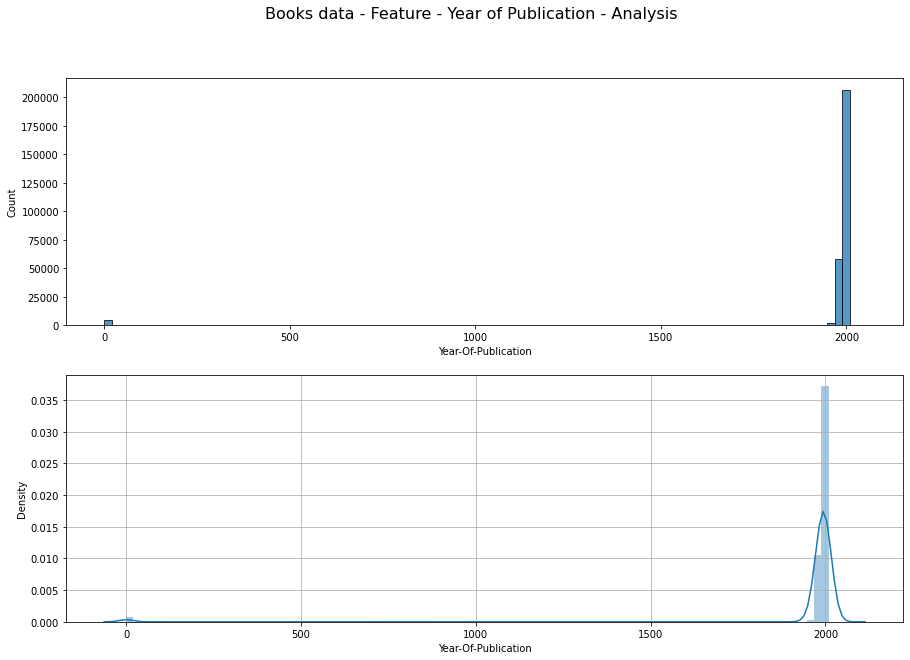

In [116]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.histplot(books['Year-Of-Publication'],bins=100, ax=ax1);
plt.grid(True)
sns.distplot(books['Year-Of-Publication'],bins=100, ax=ax2);
fig.suptitle('Books data - Feature - Year of Publication - Analysis', fontsize=16);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


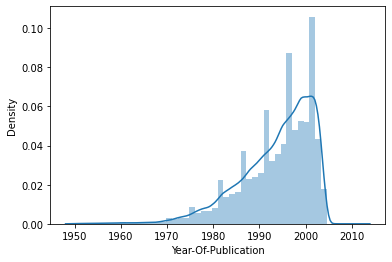

In [119]:
books = books[(books['Year-Of-Publication']>=1950) & (books['Year-Of-Publication']<=2016)]
sns.distplot(books['Year-Of-Publication'])

From the above figures it can be observed book most books published in the year of 1970 tot 2005.

Further let's look into the publisher..

In [133]:
# Lets look at the top 10 publishers with maximum no.of publications 
(books['Publisher'].value_counts())[:10]

Harlequin                   7534
Silhouette                  4220
Pocket                      3870
Ballantine Books            3764
Bantam Books                3640
Scholastic                  3155
Simon &amp; Schuster        2959
Penguin Books               2842
Berkley Publishing Group    2767
Penguin USA                 2711
Name: Publisher, dtype: int64

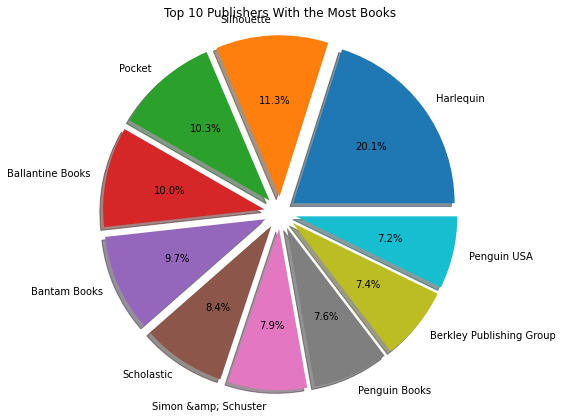

In [146]:
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(10)
labels = list(my_dict.keys())[:10]
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6], count['count'].iloc[7],count['count'].iloc[8], count['count'].iloc[9]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 10 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

In [144]:
list(my_dict.keys())[:10]

['Harlequin',
 'Silhouette',
 'Pocket',
 'Ballantine Books',
 'Bantam Books',
 'Scholastic',
 'Simon &amp; Schuster',
 'Penguin Books',
 'Berkley Publishing Group',
 'Penguin USA']